<a href="https://colab.research.google.com/github/harshitha141149/E-commerce/blob/main/Taffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# If needed, install necessary libraries
!pip install pandas numpy scikit-learn tensorflow

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Sample Data Preparation
# Here, let's create a synthetic dataset with time series features for traffic flow. # Assume you have data with columns 'time', 'day_of_week', 'traffic_volume', and other relevantfeatures.
 # Create a synthetic dataset
data = {
'time': np.linspace(0, 23, 1000), # Time of day
'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 1000),
'traffic_volume': np.random.uniform(10, 100, 1000) # Random traffic volume
}
df = pd.DataFrame(data)
# Encode categorical data (if any)
df = pd.get_dummies(df, columns=['day_of_week'])
# Split data into features and target variable
X = df.drop(['traffic_volume'], axis=1) # Features
y = df['traffic_volume'] # Target variable
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Model 1: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
# Model 2: Neural Network (with TensorFlow/Keras)
nn_model = keras.Sequential([
layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
layers.Dense(32, activation='relu'),
layers.Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)
# Predict and evaluate
y_pred_nn = nn_model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network MSE:", mse_nn)
# Results comparison
print("Random Forest MSE:", mse_rf)
print("Neural Network MSE:", mse_nn)

Random Forest MSE: 932.189762571373
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3654.8303
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3582.4001  
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3324.5420 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2972.8953 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2743.2327 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2112.5598 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1508.6489 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1062.1482 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 777.3932 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 673.4906 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Neural Network MSE: 662.2473670675047
Random Forest MSE: 932.189762571373
Neural Network MSE: 662.2473670675047


In [5]:
# If needed, install Matplotlib for graph plotting
!pip install matplotlib

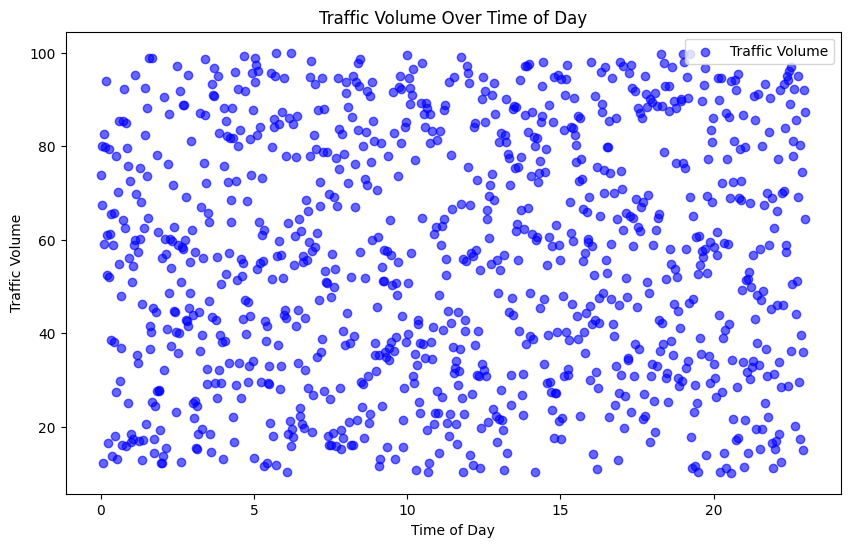

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Sample Data Preparation
data = {
    'time': np.linspace(0, 23, 1000),  # Time of day
    'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 1000),
    'traffic_volume': np.random.uniform(10, 100, 1000)  # Random traffic volume
}
df = pd.DataFrame(data)

# Encode categorical data
df = pd.get_dummies(df, columns=['day_of_week'])

# Split into features and target variable
X = df.drop(['traffic_volume'], axis=1)
y = df['traffic_volume']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict traffic volume using the trained model
y_pred_rf = rf_model.predict(X_test_scaled)

# Graph 1: Raw data visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['time'], df['traffic_volume'], alpha=0.6, c='blue', label='Traffic Volume')
plt.xlabel('Time of Day')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time of Day')
plt.legend()
plt.show()

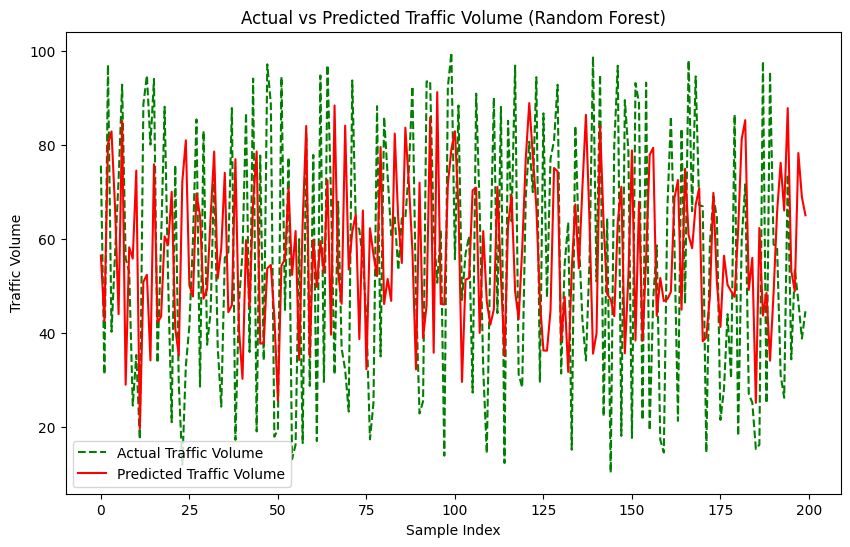

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Traffic Volume', linestyle='--', color='green')
plt.plot(y_pred_rf, label='Predicted Traffic Volume', linestyle='-', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume (Random Forest)')
plt.legend()
plt.show()
# Additional Graphs
# You can create other graphs, such as error distribution, feature importance, etc., to get deeperinsights.

Mean Squared Error (MSE): 5732.744500321466
R-squared (R2): -0.06928853745234753


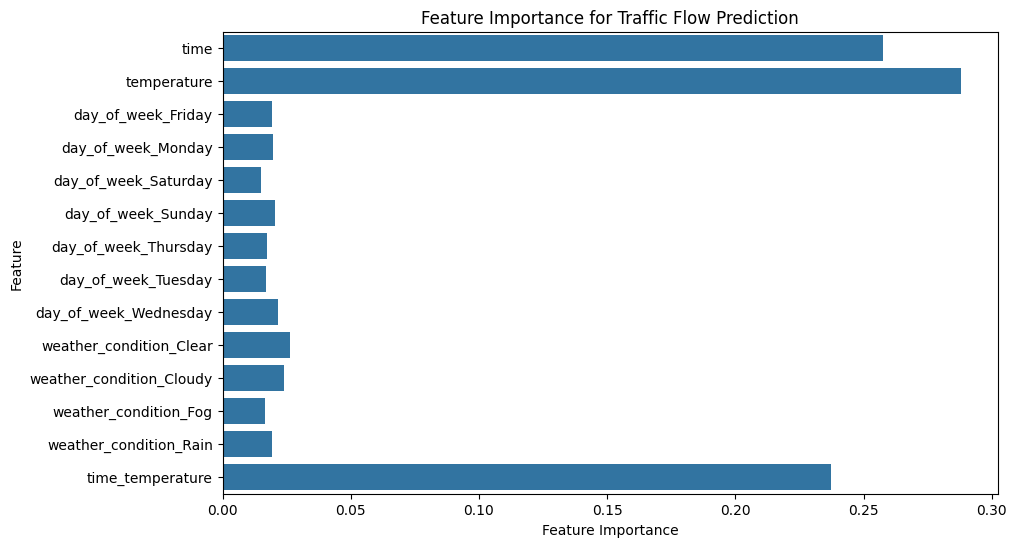

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Corrected import
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Sample Data Preparation
# Creating a synthetic dataset to simulate traffic flow data
np.random.seed(42)
data = {
'time': np.linspace(0, 23, 1000), # Time of day
'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
'Saturday', 'Sunday'], 1000),
'temperature': np.random.uniform(15, 35, 1000), # Simulating temperature changes
'weather_condition': np.random.choice(['Clear', 'Cloudy', 'Rain', 'Fog'], 1000),
'traffic_volume': np.random.uniform(50, 300, 1000) # Random traffic volume
}
df = pd.DataFrame(data)
# Data Processing
# Encoding categorical data
df = pd.get_dummies(df, columns=['day_of_week', 'weather_condition'])
# Feature Engineering
# Add interaction terms (e.g., time * temperature)
df['time_temperature'] = df['time'] * df['temperature']
# Split into features and target variable
X = df.drop(['traffic_volume'], axis=1) # Features
y = df['traffic_volume'] # Target variable
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Model Training
# Use Random Forest Regressor and tune hyperparameters
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42) #Corrected RandomForestRegressor
rf_model.fit(X_train_scaled, y_train)
# Model Evaluation
# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)
# Calculate metrics
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
# Visualizations
# Plotting feature importance
feature_importance = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Traffic Flow Prediction')
plt.show()